In [ ]:
import sys,os
is_this_colab = 'google.colab' in sys.modules
if is_this_colab:
    !git clone https://github.com/jsmaskeen/finite-automata.git
    !apt-get update -qq
    !apt-get install -y texlive-latex-base texlive-latex-recommended texlive-latex-extra texlive-fonts-recommended
    %cd finite-automata
else:
    %cd ..
    os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [2]:
from src.fa.nfa import NFA
from src.algo.kamedaweiner import KamedaWeinerMinimize
from src.utils.visualizer import Visualizer as vis
import string
import random

## Tests

In [3]:
def generate_random_nfa(num_states:int, alphabet_size:int, max_transitions_per_state_char:int):
    nfa = NFA()
    states = [f's{i}' for i in range(num_states)]
    alphabet = list(string.ascii_lowercase[:alphabet_size])

    for state in states:
        nfa.addState(state)
    nfa.setSigma(set(alphabet))
    nfa.setInitial(random.sample(states, random.randint(1, min(num_states, 2)))) # maximum 2 initial states
    num_final = random.randint(1, max(1, num_states // 2))
    for f_state in random.sample(states, num_final):
        nfa.addFinal(f_state)

    for src in states:
        for char in alphabet:
            num_dest = random.randint(0, max_transitions_per_state_char)
            dest_states = random.sample(states, min(num_dest, num_states))
            for dest in dest_states:
                nfa.addTransition(src, char, dest)
    return nfa

print("--- NFA Minimization Test ---")

num_tests = 3
min_states = 2
max_states = 5
alphabet_size = 2 
max_transitions = 2 

for i in range(num_tests):
    print(f"\n--- Test Case {i+1} ---")
    
    current_num_states = random.randint(min_states, max_states)
    original_nfa = generate_random_nfa(current_num_states, alphabet_size, max_transitions)

    print(f"Original NFA (States: {len(original_nfa.States)})")
    work = KamedaWeinerMinimize(original_nfa,store_progress=True)
    min_nfa = work.run()

    print(f"Minimized NFA (States: {len(min_nfa.States)})")
    if original_nfa.is_equivalent_to(min_nfa):
        print("Equivalence verified: Original NFA is equivalent to the minimized NFA.")
    else:
        print("WARNING: Equivalence check failed! This might indicate an issue with minimization or equivalence checking.")
    
    if len(min_nfa.States) <= len(original_nfa.States):
        print("Minimization successful (or no further minimization possible).")
    else:
        print("Minimization resulted in a larger NFA (this is unexpected for minimization).")

--- NFA Minimization Test ---

--- Test Case 1 ---
Original NFA (States: 4)
Minimized NFA (States: 4)
Equivalence verified: Original NFA is equivalent to the minimized NFA.
Minimization successful (or no further minimization possible).

--- Test Case 2 ---
Original NFA (States: 4)
Minimized NFA (States: 3)
Equivalence verified: Original NFA is equivalent to the minimized NFA.
Minimization successful (or no further minimization possible).

--- Test Case 3 ---
Original NFA (States: 2)
Minimized NFA (States: 1)
Equivalence verified: Original NFA is equivalent to the minimized NFA.
Minimization successful (or no further minimization possible).


## Get the minimal NFA for given NFA

Original NFA


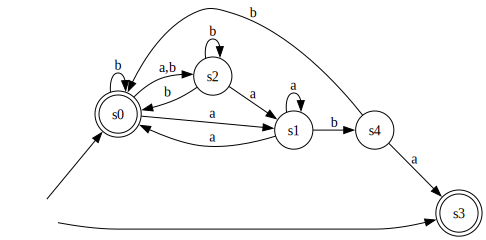

In [13]:
nfa  = generate_random_nfa(random.randint(3, 5), 2, 2)
print("Original NFA")
vis.to_graphviz(nfa)

Input NFA for some L:
NFA(
  States: {'s4', 's2', 's0', 's1', 's3'}
  Alphabet: {'b', 'a'}
  Initial States: {'s0', 's3'}
  Final States: {'s0', 's3'}
  Transitions: 
s0 -> {'a': {s1, s2}, 'b': {s0, s2}}
s1 -> {'a': {s0, s1}, 'b': {s4}}
s2 -> {'a': {s1}, 'b': {s0, s2}}
s4 -> {'a': {s3}, 'b': {s0}}
)

DFA for L:
DFA(
  States: {0, 1, 2, 3, 4, 5, 6}
  Alphabet: {'b', 'a'}
  Initial State: 0
  Final States: {0, 1, 3, 4, 5, 6}
  Transitions: {(0, 'b'): 1, (0, 'a'): 2, (1, 'b'): 1, (1, 'a'): 2, (2, 'b'): 3, (2, 'a'): 4, (3, 'b'): 1, (3, 'a'): 5, (4, 'b'): 3, (4, 'a'): 6, (5, 'b'): 3, (5, 'a'): 4, (6, 'b'): 3, (6, 'a'): 6}
)
Mapping:
{0: frozenset({'s0', 's3'}), 1: frozenset({'s0', 's2'}), 2: frozenset({'s1', 's2'}), 3: frozenset({'s0', 's4', 's2'}), 4: frozenset({'s0', 's1'}), 5: frozenset({'s3', 's1', 's2'}), 6: frozenset({'s0', 's1', 's2'})}

NFA for rev(L):
NFA(
  States: {'s4', 's2', 's0', 's1', 's3'}
  Alphabet: {'b', 'a'}
  Initial States: {'s0', 's3'}
  Final States: {'s0', 's3'}
  T

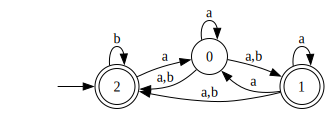

In [14]:
worker = KamedaWeinerMinimize(nfa,store_progress=True,verbose=True)
min_nfa = worker.run()
print("Min NFA")
vis.to_graphviz(min_nfa)

In [15]:
vis.to_website(worker.steps)

'https://jsmaskeen.github.io/finite-automata/steps.html?data=fgUbx'

In [ ]:
vis.to_latex(worker.steps,'First Legitimate Minimal NFA')
if is_this_colab:
    !cd "First Legitimate Minimal NFA" && for f in *.dot; do dot -Tpdf "$f" -o "${f%.dot}.pdf" >/dev/null 2>&1; done
else:
    !cd "First Legitimate Minimal NFA"/ && for %f in (*.dot) do dot -Tpdf "%f" -o "%~nf.pdf"

!cd "First Legitimate Minimal NFA" && pdflatex -interaction=batchmode steps.tex

## Enumerating all NFAs

In [29]:
nfa  = generate_random_nfa(random.randint(3, 5), 2, 2)
worker = KamedaWeinerMinimize(nfa,store_progress=True)
all_nfas = worker.run(get_all_nfas=True)
min_nfa = original_nfa
for i in all_nfas:
    if i[1]:
        min_nfa = i[0]
        break
len(all_nfas)

4

In [30]:
vis.to_website(worker.steps)

'https://jsmaskeen.github.io/finite-automata/steps.html?data=jK4kQ'

In [ ]:
vis.to_latex(worker.steps,'Enumerating all NFAs')
if is_this_colab:
    !cd "Enumerating all NFAs" && for f in *.dot; do dot -Tpdf "$f" -o "${f%.dot}.pdf" >/dev/null 2>&1; done
else:
    !cd "Enumerating all NFAs"/ && for %f in (*.dot) do dot -Tpdf "%f" -o "%~nf.pdf"

!cd "Enumerating all NFAs" && pdflatex -interaction=batchmode steps.tex